## US Car Sales - A pricing analysis on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for
vehicles are published on your site every day. You need to study data
collected over the last few years and determine which factors influence the
price of a vehicle.

## Step 1. Open the data file and study the general information

### Step 1.1.  Import libraries and dataset to analyse

When the project starts, we import the tools we need to get our job done. For this purpose we bring the following libraries into our workbench:
<br>
<br>
<br>

---

- pandas
- matplotlib.pyplot
- numpy
- warnings
- datetime



| **libraries:** | Why we use it |
| ----------- | ----------- |
| pandas: | for data manipulation and analysis. It is the basically the ground zero of our libraries. |
| matplotlib.pyplot: | for the visualisation of our data analysis.  |
| numpy: | to boost our compiled math and numeric functions. |
| warnings: | By default, not all warning messages appear. This library provides us the the control of warning messages |
| datetime: | to have more options when working with datetime datatypes |

---

<br>

We also use try - except to load the dataset.
This ignores pythons attribute to stop with a function and proceeds with an alternative tasks.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime

#load the dataset
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    from io import BytesIO
    import requests
    spreadsheet_id = "1yOntdmXKENh12RE8TB2OYrZ-6slgSk5xC4Rla2tjtMA"
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_csv(BytesIO(r.content))

### Step 1.2. Get to know the data and study the general information


After loading the libraries and the dataset in our notebook, we want to get familiar with the data and get an brief understanding what our data is about.

For this purpuse, we got a couple of methods at hand to study the data briefly:

- info()
- describe()
- sample()
- head() and / or tail()

Let's apply those to the data and understand what we are dealing with:

In [2]:
# Get to know the data. Study the general information
print()
print()
print()
print('This is the general info:')
print()
print()
df.info()
print()
print()
print('---------------------------------')
print()
print('the discription of the data')
print()
print(df.describe())
print()
print()
print('---------------------------------')
print()
print('a sample of the data')
print()
print(df.sample())
print()
print()
print('---------------------------------')
print()
print('the first 15 rows of the data')
print()
print(df.head(15))
print()
print()
print('& the last 15 rows of the data')
print()
print()
print(df.tail(15))
print()









This is the general info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


---------------------------------

the discription of the data

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     

### Conclusion:

By taking a closer look to the data, some things stands out:

* **is_4wd** value is either `1`or `0`, which seems to be an boolean data type. There are also a lot of missing values here.
* **days_listed** indicates that a car's ad is on average around `40`days online. But the median of that value is significant lower (with `33` days).
* **model_year** lists at least 1 car with a manufacturing date from `1908`, which makes senses, taking in concideration it could be one of the oldtimers.
* **price** is a column of interest here: While it contains a max price of `375000.00` USD, it also contains the lowest price of `1.00` USD. Now the max price seems plausible as it could be one of the oldtimers or a super luxory car, but what about the lowest value? While this could be an indicator for corupted data, there also might also be some explanation for this anomaly. We should take in concideration, that an angry wife tried to sell the car of her husband (since we don't know if the car was actually sold or the ad was simply taken offline) as her revange [^1]
* **Odometer** contains at least one car with `0` miles, which could be either a brand new car or the odometer was manipulated 

<br>
The following columns of our dataset contains missing values:

`model_year` <br>
`cylinders` <br>
`odometer` <br>
`paint_color` <br>
`is_4wd` <br>

We need to fix this first, before we can proceed with the analysis!

---
[^1]: <https://www.thedrive.com/news/3188/scorned-wife-selling-cheating-husbands-corvette-zr1-for-1-000>

## Step 2. Data preprocessing

### Step 2.0.1. Validating Thesis of "revenge ads"

When it comes to the thesis the car's price is so significally low, we need at least validate how often such a "special offer" appears in our dataset. Once we're clear about the frequency, we can decide in the next step how to deal with it.

Depending on the frequence of the low price in relation to the rest of the respected column, we should:
* apply the median of the column to those values, if the percentage `>= 2%` <br>
* change the value to `NaN` and apply `dropna()` method, or <br>
* ignore the value, since there not relevant if the percentage is `< 2%` <br>

In [3]:
#check for "revenge ads"

revenge_ads = df['price'].loc[df['price'] == 1].value_counts()
ads_total = len(df['price'])
revenge_ads_relation = revenge_ads/ads_total
print()
print('revange ads in absolute numbers:',revenge_ads)
print('revange ads in relative numbers:',revenge_ads_relation)


revange ads in absolute numbers: 1    798
Name: price, dtype: int64
revange ads in relative numbers: 1    0.015488
Name: price, dtype: float64


#### Conclusion:

Since the percentage of the data is `< 2%`, we can ignore the value 

---

### Step 2.1. Identyfying and studying missing values:

In order to start with our analysis, we need to prepare our dataset, hence we used the gained insight of our brief study. 

When it comes for replacing missing values, pandas provides us with a couple of methods, but common practice are the following one:

`mean()` - is used to fill with the **average value** of the column. But we have to careful since the mean can be affected by upper outliers of the data. <br>
`median()` - is the **middle value** of the data. Compared to the mean method, median is not affected by outliers.<br>
`mode()` - mode() replied the **most frequently appeared value** of the dataset<br>

<br>
As a reminder, the following columns of our dataset contains missing values:

`model_year` <br>
`cylinders` <br>
`odometer` <br>
`paint_color` <br>
`is_4wd` <br>

#### How we proceed:

1. We need to go through the columns one-by-one, which means we will face repeading comands for the respective <br>
   columns. By setting up a basement where we can adjust the variables more easily later on, if necessary.  <br>
2. We start with identifying the `mean()`, `median()` and `mode()` of each of the affected columns. <br>
   We also check how many `NaN` values we have to handle in the respective column. <br>
3. Once we are cleare about out target, we'll use `fillna()` method with `"inplace"` argument, to fill the <br>
   the `NaN` values with either `mean()` or `median()` values of the respective column

In [4]:
#Setup for this block

NaN_model = df['model_year']
NaN_cyl = df['cylinders']
NaN_odo = df['odometer']
NaN_paint = df['paint_color']
NaN_4wd = df['is_4wd']

string_1 = 'Count of NaN in'
string_mean = 'This is the mean of'
string_median = 'This is the median of'
string_mode = 'This is the most frequently appeared value in'

string_headline = 'Identyfying and studying missing values for'

s1 = 'model_year'
s2 = 'cylinders'
s3 = 'odometer'
s4 = 'paint_color'
s5 = 'is_4wd'


#####  for model_year
#####-----------------------------------------------------
print()
print()
print('----',string_headline, s1,'column','----')
print()
print('checking for NaN and and values to fill with..')
print()
count_nan_model = NaN_model.isnull().sum()

print(string_1,'model_year: ' + str(count_nan_model))
print(string_mean,s1, NaN_model.mean())
print(string_median,s1, NaN_model.median())
print(string_mode,s1, NaN_model.mode())
print()
print()

#####  for cylinders
#####-----------------------------------------------------

print('----',string_headline, s2,'column','----')
print()
print('checking for NaN and and values to fill with..')
print()
count_nan_cyl = NaN_cyl.isnull().sum()

print(string_1,'cylinders: ' + str(count_nan_cyl))
print(string_mean,s2, NaN_cyl.mean())
print(string_median,s2, NaN_cyl.median())
print(string_mode,s2, NaN_cyl.mode())
print()
print()

#####  for odometer
#####-----------------------------------------------------

print('----',string_headline, s3,'column','----')
print()
print('checking for NaN and and values to fill with..')
print()
count_nan_odo = NaN_odo.isnull().sum()

print(string_1, s3,': ' + str(count_nan_odo))
print(string_mean,s3, NaN_odo.mean())
print(string_median,s3, NaN_odo.median())
print(string_mode,s3, NaN_odo.mode())
print()
print()

#####  for paint_color
#####-----------------------------------------------------

print('----',string_headline, s4,'column','----')
print()
print('checking for NaN and and values to fill with..')
print()
count_nan_paint = NaN_paint.isnull().sum()

print(string_1, s4,': ' + str(count_nan_paint))
#print(string_mean,s4, NaN_paint.mean())
#print(string_median,s4, NaN_paint.median())
print(string_mode,s4, NaN_paint.mode())
print()
print()

#####  for is_4wd
#####-----------------------------------------------------

print('----',string_headline, s5,'column','----')
print()
print('checking for NaN and and values to fill with..')
print()
count_nan_4wd = NaN_4wd.isnull().sum()

print(string_1,s5,': ' + str(count_nan_4wd))
print(string_mean,s5, NaN_4wd.mean())
print(string_median,s5, NaN_4wd.median())
print(string_mode,s5, NaN_4wd.mode())
print()
print()


#####-----------------------------------------------------

###### Changes for V.2 #########
df["model_year"] = df.groupby('model')["model_year"].transform(lambda x: x.fillna(x.median()))
df["cylinders"] = df.groupby(['model','model_year','fuel'])["cylinders"].transform(lambda x: x.fillna(x.median()))
df["odometer"] = df.groupby(['model','condition'])["odometer"].transform(lambda x: x.fillna(x.median()))
###### End of changes ##########

NaN_model.fillna(NaN_model.median(),inplace=True)
NaN_cyl.fillna(NaN_cyl.median(),inplace=True)
NaN_odo.fillna(NaN_odo.median(),inplace=True)
NaN_4wd.fillna(0, inplace = True)
NaN_paint = NaN_paint.fillna('unknown')
print()
print()
df.info()
display(df.head(5))



---- Identyfying and studying missing values for model_year column ----

checking for NaN and and values to fill with..

Count of NaN in model_year: 3619
This is the mean of model_year 2009.75046966977
This is the median of model_year 2011.0
This is the most frequently appeared value in model_year 0    2013.0
dtype: float64


---- Identyfying and studying missing values for cylinders column ----

checking for NaN and and values to fill with..

Count of NaN in cylinders: 5260
This is the mean of cylinders 6.125235058899817
This is the median of cylinders 6.0
This is the most frequently appeared value in cylinders 0    8.0
dtype: float64


---- Identyfying and studying missing values for odometer column ----

checking for NaN and and values to fill with..

Count of NaN in odometer : 7892
This is the mean of odometer 115553.4617376756
This is the median of odometer 113000.0
This is the most frequently appeared value in odometer 0    0.0
dtype: float64


---- Identyfying and studying mis

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,191850.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


#### Conclusion:

Looks much better. We take `median()` over `mean()`, since median's advantage is its unaffected by occuring outliers of a dataset. An Indicator when it's definitely recommended to choose `median()` when the mean value is above the median, as it means there are outliers in the given dataset which distort the mean value.
<br>
When taken care of the NaN in pain_color-Column, we decided to pass the string `"unknown"` to it and replace the NaN with the string.

---

### Step 2.2. Convert the data to the required types:

Before we finally start to plot some graphs of our data,
we need to change our data type to the right one, otherwise they will cause friction on our graphs.

Therefore, we are going to change the following columns:

| **column** | **Datatype origin** || **change into** |
| ----------- | ----------- || ----------- |
| date_posted | object || datetime |
| model_year | float || integer |
| cylinders | float || integer |
| odometer | float || integer |
| is_4wd | float || boolean |

In [5]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')
df['model_year'] = df['model_year'].astype('int')


df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('bool')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


#### Conclusion:

* **date_posted**   seems to be a date, hence we changed it from `object` to `datetime` -format
* **model_year**    seems also to be a date, but also a numerical info, so we changed it from `float` to `integer`to perform further calculations for our analysis. 
* **cylinders**     while `float` type is also an numerical type, we need to change the type to `integer`,due to common sence. (Or did you ever saw a car with 3.5 Cylinders?)
* **odometer** We changed also `odometer` from `float` to `int`, in order to perform further calculations more smoothly
* **is_4wd** seems to be an `boolean` type, since boolean type only contains `1` (for `TRUE`) and `0` (for `FALSE`)

---

## Step 3. Calculate and extensions of the dataset

In this section we are going to do some calculation which will aid us later on when we're about to plot our graphs.
We also use the outcome of those calculations and extend our dataset with it, by adding additional columns.

#### What we are going to calculate:
<br>
- day of week when ad was placed <br>
- month when ad was placed <br>
- year of week when ad was placed <br>
<br>
- vehicles age (in years )when ad was placed <br>
- vehicles average mileage <br>
<br>
<br>

#### Adjusting the condition column

In addition to the calculation above, we are also going to adjust the strings of the condition column and replace them with a numerical ranking:
<br>
<br>

| **String:** | Numeric Ranking |
| ----------- | ----------- |
| new | 5 |
| like | 4 |
| excellent | 3 |
| good | 2 |
| fair | 1 |
| savage | 0 |

This table will guide us the related graphs :)

In [6]:
df['day_ad_launch'] = df['date_posted'].dt.dayofweek
df['month_ad_launch'] = pd.DatetimeIndex(df['date_posted']).month
df['year_ad_launch'] = pd.DatetimeIndex(df['date_posted']).year

###### Changes for V.2 #########
df['vehicle_age'] = df['year_ad_launch'] - df['model_year']
df.loc[df['vehicle_age'] == 0, 'vehicle_age'] = 1
###### end of changes #########

df['AVG_mileage/year'] = df['odometer'] / df['vehicle_age']
df['AVG_mileage/year'] = df['AVG_mileage/year'].round(decimals=2)


df.loc[df["condition"] =="new", "condition"] = 5 
df.loc[df["condition"] =="like new", "condition"] = 4 
df.loc[df["condition"] =="excellent", "condition"] = 3 
df.loc[df["condition"] =="good", "condition"] = 2 
df.loc[df["condition"] =="fair", "condition"] = 1 
df.loc[df["condition"] =="salvage", "condition"] = 0

df['condition'] = df['condition'].astype('int')


#### Conclusions:

For our further analysis, we need to add a couple of columns to our dataset, such are: <br>
* `day` , `month` ,  `year` of an posted ad
* `vehicle_age` , since such information was missing in our data
* `AVG_mileage/year` , because it give us conclusion about the avg usage of the yearly wear of the car 

**in addition**, <br>
we changed adjusted the string values to numerical ones and changed the datatype to integer datatype. This will help us later on in this project.

---

## Step 4. EDA - Exploratory Data Analysis:

### Step 4.1.  Study the data with Histogram

A graph says more the thousend tables. We start by plotting our first graphs as histograms. Let's have a look at the fooling parameters:

1. price
2. vehicle's age when the ad was placed
3. mileage (as odometer)
4. number of cylinders
5. condition

We will use the raw, unfiltered data, as we want to study the effect of the outliers in our histograms.

In [7]:
#print()
#print()
#print('First, lets have a look at the following data:')
#print()

#plt.hist(df)

#df.hist('price')



#df.hist('vehicle_age')
#df.hist('odometer')
#df.hist('cylinders')
#df.hist('condition')
#plt.show()


###### Changes for V.2 #########


def hist_raw(df, column, color):
    plt.hist(df[column], color = color, bins= 50)
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    plt.ylabel('n cars', fontsize = 13)
    
    if column == 'cylinders':
        plt.xlabel('n {}'.format(column), fontsize = 13)
    else:
        plt.xlabel('{} of the cars'.format(column), fontsize = 13)
    
    plt.grid()
    plt.show()

###### end of changes #########

First, lets have a look at the following data:


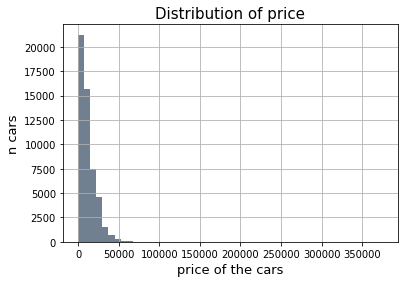

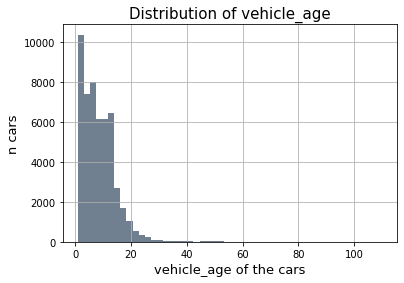

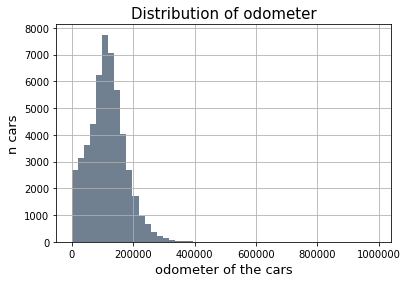

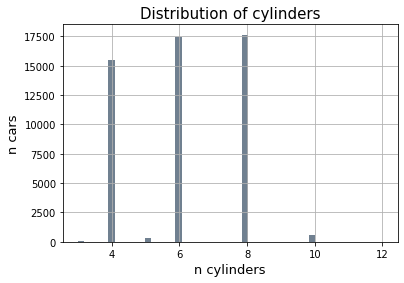

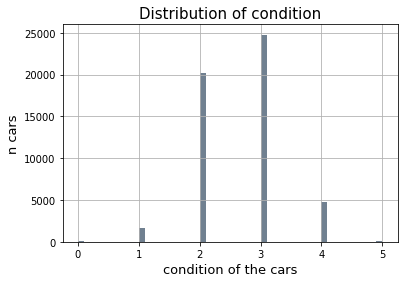

In [8]:
###### Changes for V.2 #########

columns = ['price','vehicle_age','odometer','cylinders','condition']
print('First, lets have a look at the following data:')
for column in columns:
    hist_raw(df,column,'slategrey')

###### end of changes #########

**As reminder for the condition histogram:**

| **String:** | Numeric Ranking |
| ----------- | ----------- |
| new | 5 |
| like | 4 |
| excellent | 3 |
| good | 2 |
| fair | 1 |
| savage | 0 |

---

#### Conclusion:

`price` and `odometer` have to contain high outliers, otherwise the graph woudn't be so left-side-heavy.
That means, we got some work to do here. In the next step we will determine the outliers by calculating the first and the third quantile



---

### Step 4.2.  Determining & removing upper Outliers of the data

As we explored in our histograms above, we need to do some maths again. This time, we need to  determine the outliers by calculating the 1st and 3rd quantile (25% of values are this or lower / 75% of values are this or higher). The IQR (interquartile range) is the middle 50% of our data. We can calculate this by substracting Q1 from Q3.

Then we can calculate the upper threshold for what we consider outliers. To do this, we multiply IQR by 1.5 and add it to Q3. If a value is higher than 75% of our data + 1.5 times the middle number it is considered an outlier.

We do the same thing for the lower threshold for outliers, this time calculating Q3 - 1.5 IQR.

We are going to do this for every used parameter for the histogram. Afterwards, we will compare the filtered data to the raw one (See 4.3)

In [9]:

# -------------- for price -----------------------

price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)

price_IQR = price_Q3 - price_Q1
price_new = df.query('price >= @price_Q1 - 1.5*@price_IQR and price <= @price_Q3+1.5*@price_IQR')

upper_outlier1 = price_Q3 + (1.5 * price_IQR)
df_cleaned = df.query('price < @upper_outlier1')
print()
print()



# -------------- for vehicle_age -----------------------

vehicle_age_Q1 = df['vehicle_age'].quantile(0.25)
vehicle_age_Q3 = df['vehicle_age'].quantile(0.75)

vehicle_age_IQR = vehicle_age_Q3 - vehicle_age_Q1
vehicle_age_new = df.query('vehicle_age >= @vehicle_age_Q1 - 1.5*@vehicle_age_IQR and vehicle_age <= @vehicle_age_Q3+1.5*@vehicle_age_IQR')

upper_outlier2 = vehicle_age_Q3 + (1.5 * vehicle_age_IQR)
df_cleaned = df.query('vehicle_age < @upper_outlier2')



# -------------- for odometer -----------------------

odometer_Q1 = df['odometer'].quantile(0.25)
odometer_Q3 = df['odometer'].quantile(0.75)

odometer_IQR = odometer_Q3 - odometer_Q1
odometer_new = df.query('odometer >= @odometer_Q1 - 1.5*@odometer_IQR and odometer <= @odometer_Q3+1.5*@odometer_IQR')

upper_outlier3 = odometer_Q3 + (1.5 * odometer_IQR)
df_cleaned = df.query('odometer < @upper_outlier3')

# -------------- for cylinders -----------------------

cylinders_Q1 = df['cylinders'].quantile(0.25)
cylinders_Q3 = df['cylinders'].quantile(0.75)

cylinders_IQR = cylinders_Q3 - cylinders_Q1
cylinders_new = df.query('cylinders >= @cylinders_Q1 - 1.5*@cylinders_IQR and cylinders <= @cylinders_Q3+1.5*@cylinders_IQR')

upper_outlier4 = cylinders_Q3 + (1.5 * cylinders_IQR)
df_cleaned = df.query('cylinders < @upper_outlier4')


# -------------- for condition -----------------------

condition_Q1 = df['condition'].quantile(0.25)
condition_Q3 = df['condition'].quantile(0.75)

condition_IQR = condition_Q3 - condition_Q1
condition_new = df.query('condition >= @condition_Q1 - 1.5*@condition_IQR and condition <= @condition_Q3+1.5*@condition_IQR')

upper_outlier5 = condition_Q3 + (1.5 * condition_IQR)
df_cleaned = df.query('condition < @upper_outlier5')



---

### Step 4.3.  Compare the filtered data with the raw data


for price



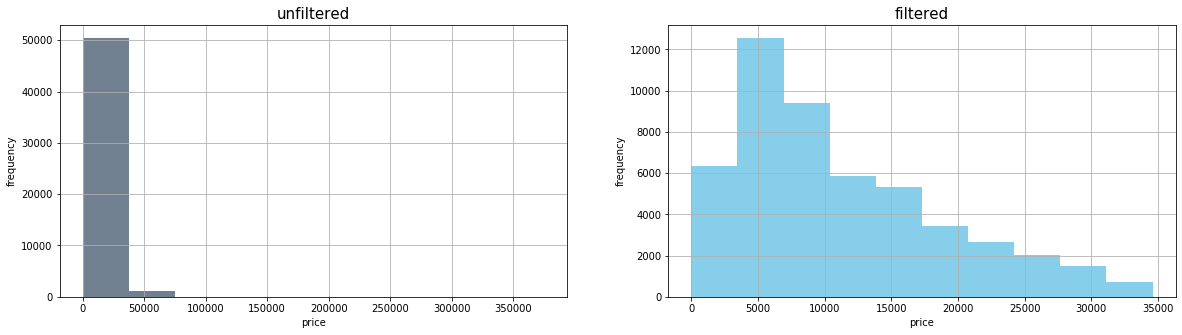

In [10]:
print()
print('for price')
print()

n_bins = 10

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.hist(df.price, color = "slategray", bins=n_bins)
ax1.grid()
ax1.set_xlabel('price')
ax1.set_ylabel('frequency')
ax1.set_title('unfiltered', fontsize = 15)

ax2.hist(price_new.price, color = "skyblue",  bins=n_bins)
ax2.grid()
ax2.set_xlabel('price')
ax2.set_ylabel('frequency')
ax2.set_title('filtered', fontsize = 15)
plt.show()



As we removed the outliers for the `price` parameter, we can see that the majority of the car ads laying in range between 4000 USD to 15,000 USD. The minority builds car ads with a price above 15,000 USD.
This makes sense, since those advertisement plattforms are more often used to sell used cars then new ones.


for vehicle_age



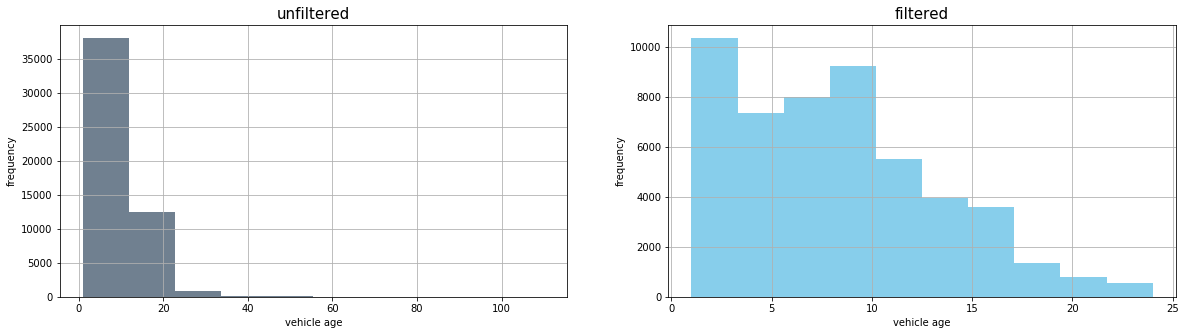

In [11]:
print()
print('for vehicle_age')
print()

n_bins = 10

fig1 = plt.figure(figsize=(20,5))
ax3 = fig1.add_subplot(1,2,1)
ax4 = fig1.add_subplot(1,2,2)


ax3.hist(df.vehicle_age, color = "slategray", bins=n_bins)
ax3.grid()
ax3.set_xlabel('vehicle age')
ax3.set_ylabel('frequency')
ax3.set_title('unfiltered', fontsize = 15)

ax4.hist(vehicle_age_new.vehicle_age, color = "skyblue", bins=n_bins)
ax4.grid()
ax4.set_xlabel('vehicle age')
ax4.set_ylabel('frequency')
ax4.set_title('filtered', fontsize = 15)
plt.show()



After we filtered the outliers, we can now see that the vehicle's age of the ads are at the peak at an age of 5 to 7 years. In addition the age of the cars is decreasing slowly with every additional age (except the range 5 to 7 years). In total, the majority of the ads lies in an age range from 0/1 year to 14 years.


for odometer



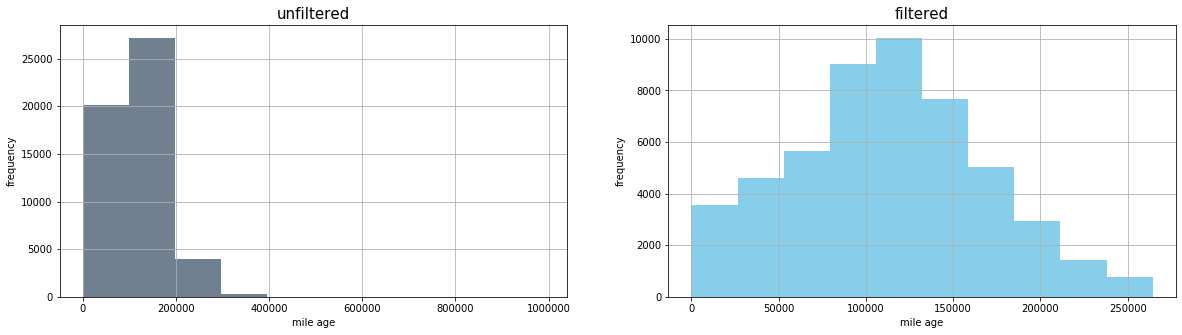

In [12]:
print()
print('for odometer')
print()
n_bins = 10

fig2 = plt.figure(figsize=(20,5))
ax5 = fig2.add_subplot(1,2,1)
ax6 = fig2.add_subplot(1,2,2)


ax5.hist(df.odometer, color = "slategray", bins=n_bins)
ax5.grid()
ax5.set_xlabel('mile age')
ax5.set_ylabel('frequency')
ax5.set_title('unfiltered', fontsize = 15)

ax6.hist(odometer_new.odometer, color = "skyblue", bins=n_bins)
ax6.grid()
ax6.set_xlabel('mile age')
ax6.set_ylabel('frequency')
ax6.set_title('filtered', fontsize = 15)
plt.show()



Here we almost get a gaussian normal distribution which menas we have the most values in the middle and have an almost even decrease on both sides. The reason is, that the older a car is, the more likely is it, that someone sells it. This goes until the point, where cars get more likely to die. Most cars never reach the 200000km so there are less cars to sell.
<br>


for cylinders



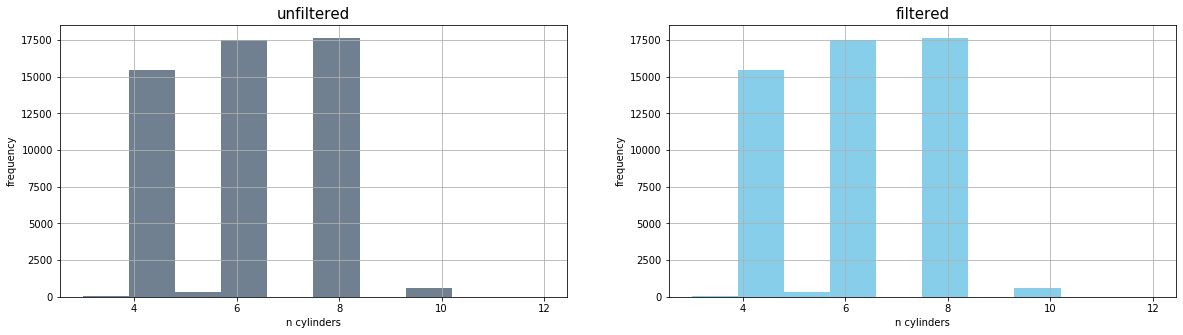

In [13]:
print()
print('for cylinders')
print()

n_bins = 10

fig3 = plt.figure(figsize=(20,5))
ax7 = fig3.add_subplot(1,2,1)
ax8 = fig3.add_subplot(1,2,2)

ax7.hist(df.cylinders, color = "slategray", bins=n_bins)
ax7.grid()
ax7.set_xlabel('n cylinders')
ax7.set_ylabel('frequency')
ax7.set_title('unfiltered', fontsize = 15)

ax8.hist(cylinders_new.cylinders, color = "skyblue", bins=n_bins)
ax8.grid()
ax8.set_xlabel('n cylinders')
ax8.set_ylabel('frequency')
ax8.set_title('filtered', fontsize = 15)
plt.show()



No change here. However, the reason 4, 6 and 8 cylinders appear dominant is that those are most common in the US Market. Cars with 10 Cylinders are more exotic ones.


for condition



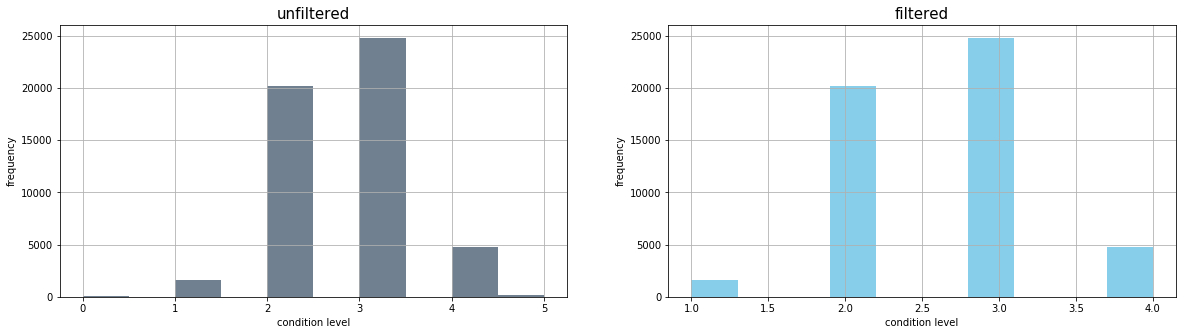

In [14]:
print()
print('for condition')
print()

n_bins = 10

fig4 = plt.figure(figsize=(20,5))
ax9 = fig4.add_subplot(1,2,1)
ax10 = fig4.add_subplot(1,2,2)

ax9.hist(df.condition, color = "slategray", bins=n_bins)
ax9.grid()
ax9.set_xlabel('condition level')
ax9.set_ylabel('frequency')
ax9.set_title('unfiltered', fontsize = 15)

ax10.hist(condition_new.condition, color = "skyblue", bins=n_bins)
ax10.grid()
ax10.set_xlabel('condition level')
ax10.set_ylabel('frequency')
ax10.set_title('filtered', fontsize = 15)
plt.show()



**As reminder for the condition histogram:**

| **String:** | Numeric Ranking |
| ----------- | ----------- |
| new | 5 |
| like | 4 |
| excellent | 3 |
| good | 2 |
| fair | 1 |
| savage | 0 |

---
We can see that we removed the cars with both `new` condition and those who are `savage`. That confirms the theory, that those car selling plattform are more used to trade used cars, taking in concideration that the majority of condition are `3` (for excellent) & `2` (for good). It's a no-brainer that the condition of the car has an impact on the price.


#### Conclusion:

As we removed the outliers of the given parameters, we were now able to understandt the data more clearly.


---

### Step 4.4.  Days of Advertisement

Now we want to look at the duration of the car ads.
To do this, we are going to at first a histogram and secondly a boxplot graph to highlight the `mean()` and the `median()` days of an listed ad.

**Plotting the histogram:**

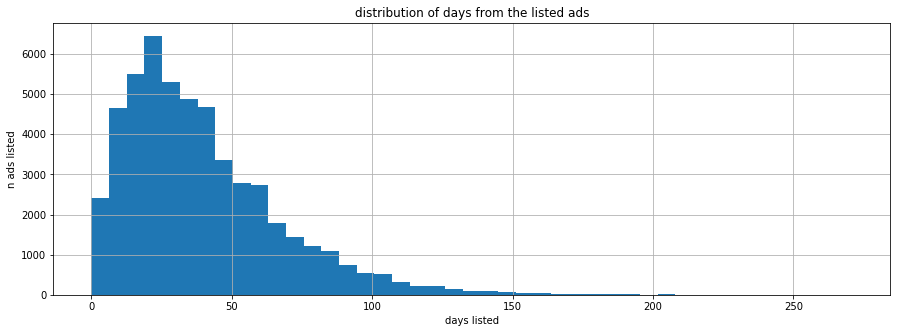

In [15]:
plt.figure(figsize=(15,5))
plt.hist(df['days_listed'], bins=43)

###### Changes for V.2 #########

plt.title('distribution of days from the listed ads')
plt.xlabel('days listed')
plt.ylabel('n ads listed')

###### end of changes #########

plt.grid()
plt.show()

In [16]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

**Plotting the boxplot-chart:**

33.0

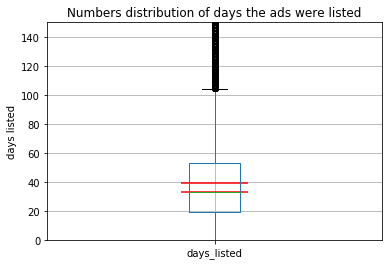

In [17]:

days_listed_median = df_cleaned['days_listed'].median()
days_listed_mean = df_cleaned['days_listed'].mean()

days_listed = df_cleaned['days_listed']
plt.ylim(0,150)
plt.hlines(y=[days_listed_median,days_listed_mean], xmin=0.9, xmax=1.1, color='red')
q36, q16 = np.percentile(df_cleaned['days_listed'], [75 ,25])
plt.xlabel(' ')
plt.ylabel('days listed')
plt.title('Numbers distribution of days the ads were listed') 
df_cleaned.boxplot('days_listed')
q36
q16
days_listed_mean
days_listed_median

#### Conclusion:

As the boxplot shows, the usual lifespan on an ad is somewhere between 19 and 53 days. 
* If the lifespan is **less** then `19 days`, it could mean the ad was removed quickly (either taken offline by admin or car was sold).
* If the lifespan of the ad was **greater** then `53 days`, we can concider those ads as abnormaly long.

While the median lifespan is 33 days, the mean lifespan is with 39,57 days almost 7 days longer. So we can assume, that
* on avareage, an ad is listed for almost 40 days
* there are more ads with a higher lifespan then those with a shorter one.

---

### Step 4.5.  Number of Ads and the average price for each vehicle type

Time to see which two vehicle type have the most ads listed on our dataset.
For doing so, first we rank the type by the number of listed ads as a table.
Secondly, we plot a bar chart to visualize the results.

**Printing the table:**

In [18]:
ads_price = df_cleaned.pivot_table(
    index = 'type',
    values = 'price',
    aggfunc = ['count', 'mean']
)

ads_price.columns = ['number_of_ads', 'avg_price']
ads_price.sort_values('number_of_ads')
print(ads_price.sort_values('number_of_ads'))


             number_of_ads     avg_price
type                                    
bus                     24  17135.666667
offroad                214  14292.294393
other                  256  10989.714844
convertible            441  14206.900227
van                    632  10548.123418
hatchback             1044   6854.342912
mini-van              1158   8150.159758
wagon                 1541   9088.134328
coupe                 2295  14261.994771
pickup                6978  16019.906707
sedan                12105   6949.603387
truck                12308  16654.646978
SUV                  12386  11138.225900


**Print the bar chart:**

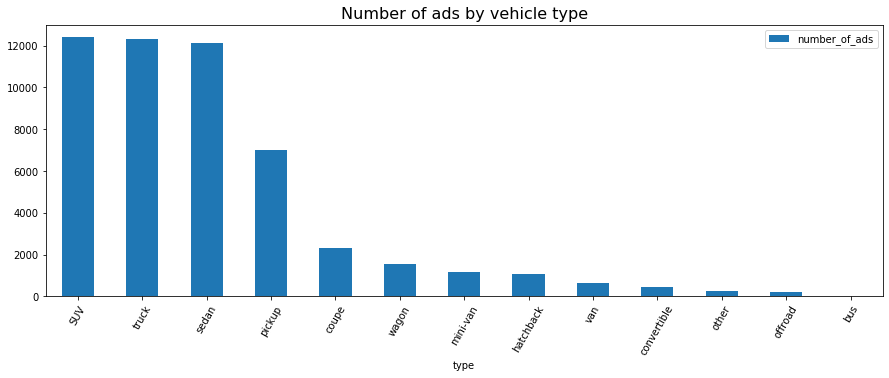

In [19]:
ads_price.sort_values('number_of_ads', ascending=False)\
              .plot(kind='bar',y='number_of_ads',rot=60, figsize=(15,5))
plt.title('Number of ads by vehicle type', fontsize=16)
plt.show()

#### Conclusion:
As we can see, SUV and Trucks have the most ads listed in our data. Following up by the Sedan type.

---

### Step 4.6.  Effect on the car price

### Step 4.6.1.  For categorial variables

### Step 4.6.1.2.  Effect of paint color on the car price

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


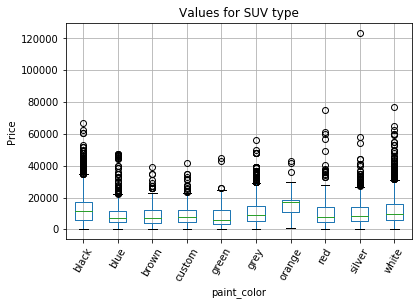

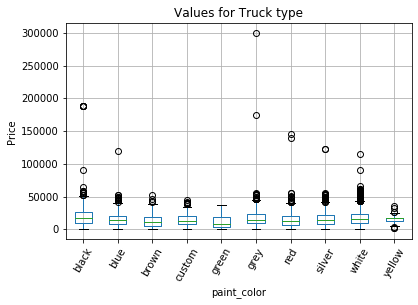

In [20]:
#ground setup for suv & truck

suv = df_cleaned.query('type == "SUV"')
suv['paint_color'].value_counts()
suv_color = suv.query('paint_color != ["yellow", "purple"]')

truck = df_cleaned.query('type == "truck"')
truck['paint_color'].value_counts()
truck_color = truck.query('paint_color != ["orange", "purple"]')


#boxplot by color for suv & truck

suv_color.boxplot(column='price',rot=60, by='paint_color')
plt.xlabel('paint_color')
plt.ylabel('Price')
plt.title('Values for SUV type') 
plt.suptitle("")

truck_color.boxplot(column='price',rot=60, by='paint_color')
plt.xlabel('paint_color')
plt.ylabel('Price')
plt.title('Values for Truck type')
plt.suptitle("")
plt.show()


#### Conclusion:

Depending on the car type, we can see the prefered colors of the market as well.
* for Truck: `black`, `grey`, `red` are the top 3 colors by price
* for SUV:  `red`, `silver` and `white` are the top 3 colors by price.

Looks like the next SUV should be in white, if I want to aim for good price afterwards.

---

### Step 4.6.1.2.  Effect of car transmission type on the car price

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


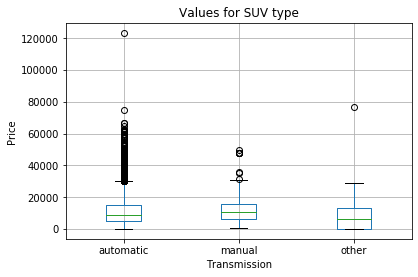

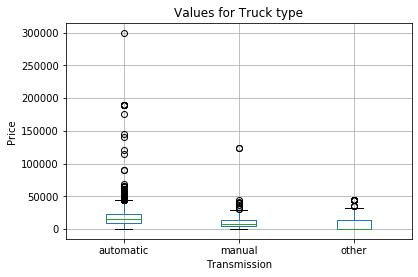

In [21]:
#boxplot by transmission for suv & truck

suv.boxplot(column='price', by='transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Values for SUV type') 
plt.suptitle("")

truck.boxplot(column='price', by='transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Values for Truck type')
plt.suptitle("")
plt.show()

#### Conclusion:
As we see here, the not only the automatic transmission is the prefered transmission type for the americans, it builds the majority of almost the whole price range. Which makes sense, since you won't by a car which you can't drive.
Thats being said, it's for both car types more likely to be sold when the are on automatic transmission.

---

### Step 4.6.2.  For numerical variables

### Step 4.6.2.1.  Effect of Mileage (odometer) on the cars price


Influence of odometer on price



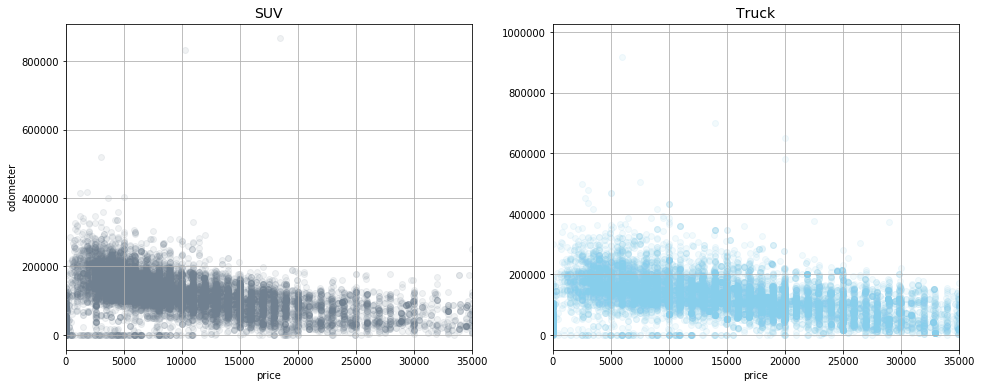

In [22]:
plt.figure(figsize=(16, 6))

#odometer
search_item = 'odometer'

print()
print('Influence of',search_item ,'on price')
print()

#for SUV
plt.subplot(1,2,1)
plt.scatter(suv['price'], suv[search_item], color = "slategray", alpha = 0.1)
plt.title(('SUV'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.ylabel('odometer')
plt.xlim(0,35000)


#for Truck
plt.subplot(1,2,2)
plt.scatter(truck['price'], truck[search_item], color = "skyblue", alpha = 0.1)
plt.title(('Truck'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.xlim(0,35000)

plt.show()



#### Conclusion:

We can see on both graphs a small downfall to the x-axis when increasing the price. Assuming the lower the mileage, the better car health, the higher the price. We can also see that trucks are sold with an higher mileage at the same price level as SUVs. This could be an indicator for an higher lifespan of trucks, compared to the lifespan of SUVs.

---

### Step 4.6.2.2.  Effect of the vehicle age on the cars price


Influence of vehicle_age on price



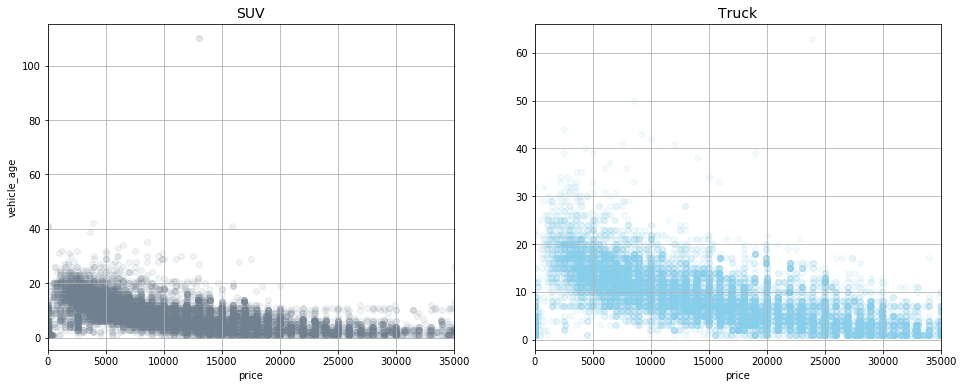

In [23]:
plt.figure(figsize=(16, 6))

#vehicle_age
search_item = 'vehicle_age'

print()
print('Influence of',search_item ,'on price')
print()

#for SUV
plt.subplot(1,2,1)
plt.scatter(suv['price'], suv[search_item], color = "slategray", alpha = 0.1)
plt.title(('SUV'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.ylabel(search_item)
plt.xlim(0,35000)


#for Truck
plt.subplot(1,2,2)
plt.scatter(truck['price'], truck[search_item], color = "skyblue", alpha = 0.1)
plt.title(('Truck'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.xlim(0,35000)

plt.show()



#### Conclusion:

As mentioned above, Trucks seems to have a higher lifespan than SUVs. However, you can clearly determine, that that car price raises, the younger the car's age is. 
* For SUVs, you should sell your car, once its seven years old if you want to archive a revenue above the median price
* For Trucks, you can use 1.5 times the lifespan of an SUV for your usage duration, but not longer.

---

### Step 4.6.2.3.  Effect of condition on the cars price


Influence of condition on price



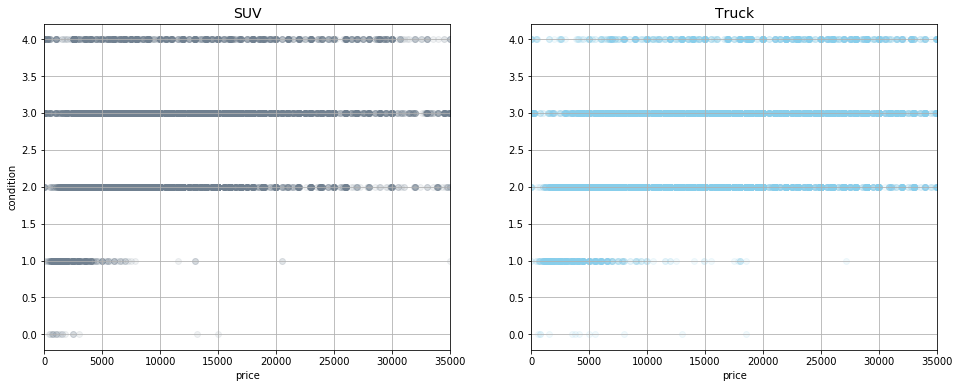

In [24]:
plt.figure(figsize=(16, 6))

#condition
search_item = 'condition'

print()
print('Influence of',search_item ,'on price')
print()

#for SUV
plt.subplot(1,2,1)
plt.scatter(suv['price'], suv[search_item], color = "slategray", alpha = 0.1)
plt.title(('SUV'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.ylabel(search_item)
plt.xlim(0,35000)


#for Truck
plt.subplot(1,2,2)
plt.scatter(truck['price'], truck[search_item], color = "skyblue", alpha = 0.1)
plt.title(('Truck'), fontsize=14)
plt.suptitle("")
plt.grid()
plt.xlabel('price')
plt.xlim(0,35000)

plt.show()



**As reminder for the condition scatterplot:**

| **String:** | Numeric Ranking |
| ----------- | ----------- |
| new | 5 |
| like | 4 |
| excellent | 3 |
| good | 2 |
| fair | 1 |
| savage | 0 |


---

#### Conclusion:

Comparing Truck and SUVs, the assuming of a higher lifespan of a truck could be applied as well. If you want to make revenue for re-selling your Truck or SUV and your revenue shall be above the median price range, the car should be at least in `good` condition.

We can also see, that the better the condition of the car, the shifts the majority of the price to the righthandside of the graph.

---

### Step 5. Write an overall conclusion

Now when it comes to the question of "which parameters have an impact on the price", take the following conclusion in concideration:

1. Aim for something big: A SUV or Truck (the car type)
2. Choose the right color: Red for Trucks and White for SUVs
3. As for the American Market, the Automatic Transmission is the one you are looking for
4. Once your car reaches an mileage of near 100,000, it's time to sell the car
5. Also, when your car reaches it's 6th year, it's time to sell it
6. Condition: This should be a no-brainer, but hold your car in good shape!
7. The typical lifespan of your ad last somewhere between 19 and 53 days, while on average 33 days.
   Which means, you got about 3-4 weeks to get a new car, once put your car ad online
   (or ignore this advice and take the bycicle, its better for the enviroment!)
   
